# Linear Regression (선형회귀)

## Example of one feature (x1)

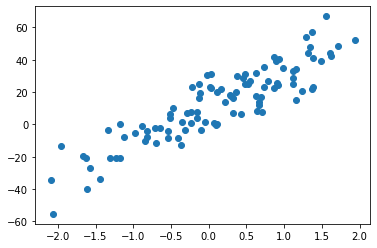

In [1]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [2]:
# --------
w=np.random.randn()   
b=np.random.randn()

lr = 0.05          # learning rate
n_epoch = 200
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* 2 * ((y_pred - y)*x).mean()
    b = b - lr* 2 * (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)
        
print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 578.9559784170933 w= 3.642189542373892 b= 2.3917230678818306
epoch= 10 loss= 157.23549773759606 w= 14.82681388799381 b= 8.543522383524607
epoch= 20 loss= 108.66453498975265 w= 18.857541147074862 b= 10.178454755445804
epoch= 30 loss= 102.722342639233 w= 20.337542556995913 b= 10.563139979309101
epoch= 40 loss= 101.94149957185091 w= 20.891120939245 b= 10.628624901680451
epoch= 50 loss= 101.8310429053949 w= 21.101872091670263 b= 10.625571229983418
epoch= 60 loss= 101.81435330226103 w= 21.18342402838544 b= 10.614576087734154
epoch= 70 loss= 101.81169742277545 w= 21.215443259539686 b= 10.606873337772228
epoch= 80 loss= 101.8112589589193 w= 21.228174175505114 b= 10.602659416160652
epoch= 90 loss= 101.81118479979496 w= 21.233290218382237 b= 10.60057943209408
epoch= 100 loss= 101.81117206562034 w= 21.235364350343062 b= 10.599607741322242
epoch= 110 loss= 101.81116985881675 w= 21.236211285665576 b= 10.599168675976697
epoch= 120 loss= 101.81116947428958 w= 21.236559107953177 b= 10.

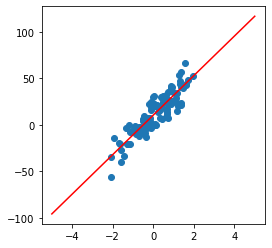

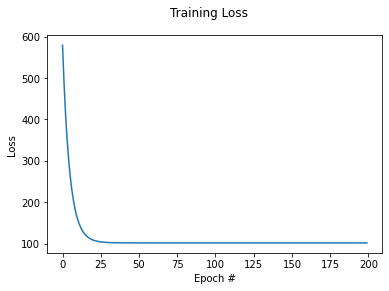

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-5,5,100) 
yy = w * xx + b
plt.plot(xx,yy,c='r') 
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Training two features (x1, x2)

In [4]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n) 
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.02                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)
        
print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 388.9570362553207 w1= 25.94 w2= 36.33 b= 53.06


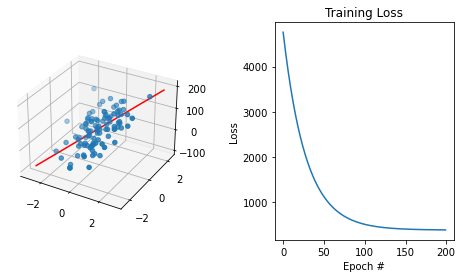

In [5]:
plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

## Using regression function (LinearRegression)

In [6]:
# ex3: using regression function (LinearRegression and SGDRegressor)

from sklearn.linear_model import LinearRegression, SGDRegressor

n=100
x1, x2 = np.random.randn(n), np.random.randn(n)
y = x1*30 + x2*40 + 50 + np.random.randn(n)*20
X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

# Ordinary least squares (OLS) linear regression

model = LinearRegression()        # create model
model.fit(X,y)                    # train model

print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)


score:  0.8724683290516475
w1= 31.945756375691808 w2= 38.345873036970104 b= 52.806958122364414


In [7]:
# prediction
new_X=[1,3]
print(model.predict([new_X])) 
#----
z = np.random.rand(10,2)
model.predict(z)

[199.79033361]


array([ 96.32969438,  96.14639163,  98.50588139,  97.98183681,
        75.54667891,  79.3667751 ,  96.59669691, 105.24033822,
        98.64984416,  88.79713517])

w1 = 31.945756375691808, w2 = 38.345873036970104, b = 52.806958122364414


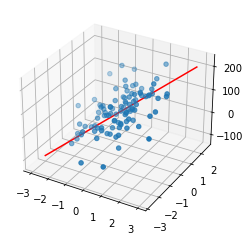

In [8]:
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_
print("w1 = {}, w2 = {}, b = {}".format(w1, w2, b))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

In [9]:
model = SGDRegressor()
model.fit(X,y)
print("score = ", model.score(X,y))
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_
print("w1 = {}, w2 = {}, b = {}".format(w1, w2, b))

score =  0.8724679277235884
w1 = 31.94872301372074, w2 = 38.31334355218167, b = [52.80096995]


In [10]:
# normal equation (OLS)
X2 = np.concatenate([X, np.ones(len(X)).reshape(-1,1)], axis=1)
w_ols = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y)
w_ols

array([31.94575638, 38.34587304, 52.80695812])

## Use make_regression function for training data

In [11]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
X, y = make_regression(n_samples=2000, n_features=2, noise=2.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.71577391 177.02800581  54.17648943 -79.29930148 -41.47720451]


In [12]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9991477009521702

# Classification (선형분류)

## Linear classification (use Cross Entropy as loss function)
- also called log loss (logistic regression)
- Logistic Regression
- Classification by Calculating parameters one by one

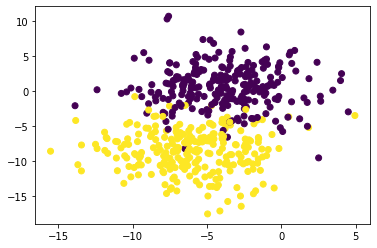

In [13]:
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [14]:
y[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [15]:
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn() 

def sigmoid_activation(z):
    return 1.0 / (1 + np.exp(-z))

lossHistory = []
epochs = 300
alpha = 0.01

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction

    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)
    
    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1
    
    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)

0.23090041966888186 -0.5472373417342912 -0.14887417742124245
0.884


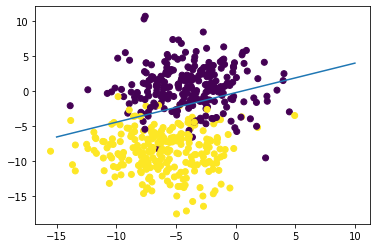

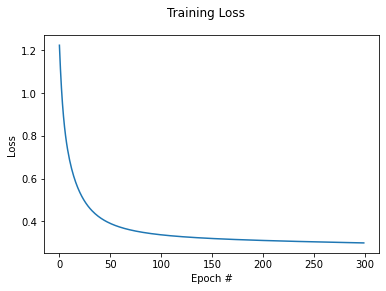

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-15,10,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Use library function: SGDClassifier()
- default: hinge loss (used in SVM)

In [17]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)

SGDClassifier:  0.944
[[ -8.5318907  -33.87219689]] [-176.86140721]
Logistic Regression:  0.95
[[-0.21968752 -1.07145897]] [-5.38081202]


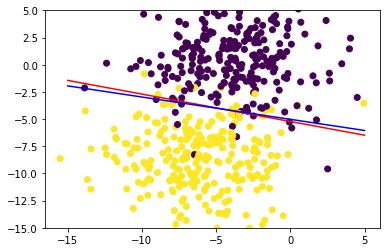

In [18]:
clf = SGDClassifier()      
clf.fit(X[:,:2], y)    
print("SGDClassifier: ", clf.score(X[:, :2],y))
print(clf.coef_, clf.intercept_)

log = LogisticRegression()      
log.fit(X[:,:2], y)    
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')

## Hinge Loss
- Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1.
- Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident.
- Himge loss for input-output pair (x,y) is given as:
- L = max(0, 1 - yf(x))
- L = 0 (if y*f(x) >= 1), 1-y*f(x) (otherwise)
- dL/dw1 = 0 (if y*f(x) >= 1), -y*x1 (otherwise)
      

In [19]:
N = 500
(X, y_org) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
y = y_org.copy()
y[y==0] = -1
X[:5], y[:5], y_org[:5]

(array([[ -5.48619226,   1.21306671],
        [ -2.89056798,  -9.18025054],
        [ -1.5288614 ,   1.01129561],
        [ -7.48266658,  -9.99569036],
        [ -7.03983988, -10.35802726]]),
 array([-1,  1, -1,  1,  1]),
 array([0, 1, 0, 1, 1]))

0.6149930245250683 -1.1229450995524395 -0.5309454912212451
0.944


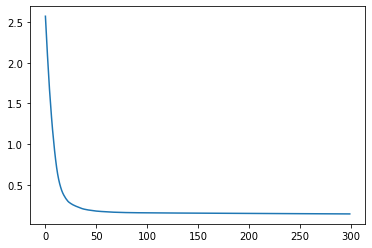

In [20]:
w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()
lossHistory = []
epochs = 300
alpha = 0.01

N = len(x1)
for epoch in np.arange(epochs):

    w1_deriv, w2_deriv, b_deriv, loss = 0., 0., 0., 0.
    for i in range(N):
        score = y[i]*(w1*x1[i] + w2*x2[i] + b)
        if score <= 1:
            w1_deriv = w1_deriv - x1[i]*y[i]
            w2_deriv = w2_deriv - x2[i]*y[i]
            b_deriv = b_deriv - y[i]
            loss = loss + (1 - score)
        # else : derivatives are zero. loss is 0
    w1_deriv /= float(N)      # mean
    w2_deriv /= float(N)
    b_deriv  /= float(N)
    loss /= float(N)

    w1 = w1 - alpha * w1_deriv
    w2 = w2 - alpha * w2_deriv
    b  =  b - alpha *  b_deriv

    lossHistory.append(loss)
    
print(w1, w2, b)

accuracy = ((w1*x1 + w2*x2 + b > 0) == y_org).sum()/N
print(accuracy)
plt.plot(lossHistory)

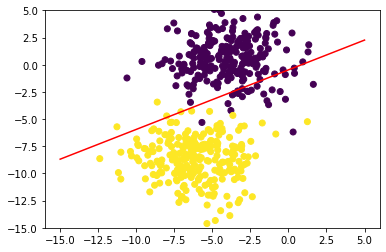

In [21]:
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

# Normal Equation

In [22]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

Text(0, 0.5, 'Target')

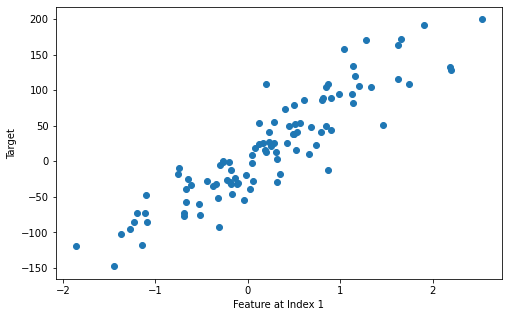

In [23]:
X, y = make_regression(n_samples=100, 
                       n_features=2, 
                       noise=10, 
                       random_state=1)

plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 1], y, marker='o')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")

In [24]:
X.shape, y.shape

((100, 2), (100,))

In [25]:
# linear regression
X_sc = StandardScaler().fit_transform(X)
# print(X_sc[:5], y[:5])
model = LinearRegression()        # create model
model.fit(X_sc,y)                    # train model
print("coefficients and bias: ", model.coef_, model.intercept_)
model.score(X_sc,y)

model.predict(X_sc[:5])

coefficients and bias:  [29.52899512 71.88859745] 19.28081595550047


array([ 69.28675103, -36.17117272, -38.2733512 , -11.02296748,
       -43.112981  ])

- normal equation: 
  - y = XW
  - W* = (X_{-1}X)_{-1}X_{T}y

In [26]:
# normal equation
X = X_sc    # scaled (but, actually you don't need scaling here.)
X_b = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("weight: ", w_best[:-1], "bias: ", w_best[-1])

# prediction for the first 5 (y = XW)
Xt = X[:5]
Xt_b = np.concatenate([Xt, np.ones((Xt.shape[0], 1))], axis=1)
Xt_b.dot(w_best)

weight:  [29.52899512 71.88859745] bias:  19.280815955500472


array([ 69.28675103, -36.17117272, -38.2733512 , -11.02296748,
       -43.112981  ])

- we can see that the two methods give the same result.

# Locally weighted Regression
- example from https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf

In [27]:
import numpy as np
np.random.seed(8)

def train_gen(n_samples):
    X = np.random.randn(n_samples,1)
    y = 2*(X**3) + 10 + 4.6*np.random.randn(n_samples,1)
    return X, y

In [28]:
# weight matrix
def wm(point, X, tau): 
    
    # tau --> bandwidth
    # X --> Training data.
    # point --> the x where we want to make the prediction.
      
    m = X.shape[0]   # No of training examples
    w = np.mat(np.eye(m))  # Initialising W as an identity matrix.
    
    # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w    # shape: 1000 x 1000

In [29]:
def predict(X, y, point, tau): 
    
    m = X.shape[0]   # number of training examples. 
    
    # Appending a cloumn of ones in X to add the bias term.
    # Just one parameter: theta, that's why adding a column of ones        
    # to X and also adding a 1 for the point where we want to predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
    # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix 
    w = wm(point_, X_, tau)     # diagonal matrix (n_samples x n_samples)

    if (len(X) < 6) :
        print(w.round(2), "X = :", X, "point= :", point)  # to see how it looks like
                                                          # only when n_samples < 6

   # Calculating parameter theta using the formula.
    theta = np.linalg.inv(X_.T@(w @ X_))@(X_.T@(w @ y)) 
    
   # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

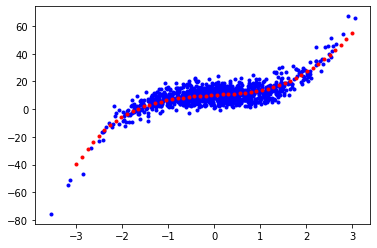

In [30]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to predict.
   # tau --> the bandwidth.     
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

X, y = train_gen (1000)
plot_predictions(X, y, 0.7, 50)   # try to change tau: 2, 1, 0.5, ...0.05
                                 # too small -> overfitting

[[0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.36 0.  ]
 [0.   0.   0.   0.   0.  ]] X = : [[ 0.02078144]
 [ 0.42475742]
 [-0.35589455]
 [-2.00444472]
 [ 0.25967864]] point= : -3.0
[[0.09 0.   0.   0.   0.  ]
 [0.   0.02 0.   0.   0.  ]
 [0.   0.   0.26 0.   0.  ]
 [0.   0.   0.   0.77 0.  ]
 [0.   0.   0.   0.   0.04]] X = : [[ 0.02078144]
 [ 0.42475742]
 [-0.35589455]
 [-2.00444472]
 [ 0.25967864]] point= : -1.5
[[1.   0.   0.   0.   0.  ]
 [0.   0.83 0.   0.   0.  ]
 [0.   0.   0.88 0.   0.  ]
 [0.   0.   0.   0.02 0.  ]
 [0.   0.   0.   0.   0.93]] X = : [[ 0.02078144]
 [ 0.42475742]
 [-0.35589455]
 [-2.00444472]
 [ 0.25967864]] point= : 0.0
[[0.11 0.   0.   0.   0.  ]
 [0.   0.31 0.   0.   0.  ]
 [0.   0.   0.03 0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.21]] X = : [[ 0.02078144]
 [ 0.42475742]
 [-0.35589455]
 [-2.00444472]
 [ 0.25967864]] point= : 1.5
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]


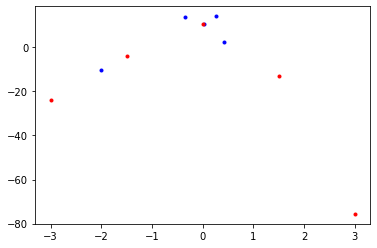

In [31]:
X, y = train_gen (5)
plot_predictions(X, y, 0.7, 5)

# Exercise

- exam?

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier
from sklearn.datasets import make_regression, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
def show_plot(model, X, i):
    df = pd.DataFrame(X)
    coef = pd.Series(model.coef_, df.columns)
    plt.subplot(1,3,i)
    coef.plot(kind='bar', title='model coefficients')

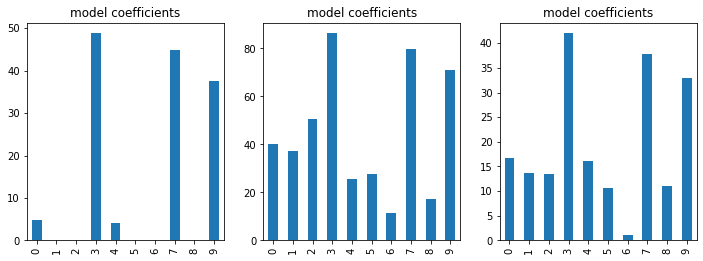

In [34]:
X, y = make_regression(n_samples=100, n_features=10, noise=30, random_state=1)
X = StandardScaler().fit_transform(X)

clf1, clf2, clf3 = (Lasso(alpha = 30), LinearRegression(), Ridge(alpha = 100))
clfs = [clf1, clf2, clf3]
plt.figure(figsize=(12,4))
for i, clf in enumerate(clfs, 1):
    clf.fit(X, y)
    show_plot(clf, X, i)

0.97
[[ -9.80696434 -34.89762155]] [-256.11516793]


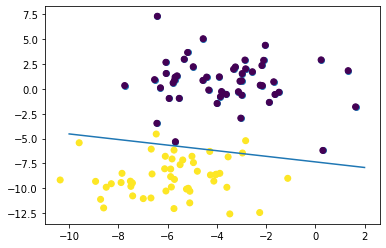

In [35]:
(X, y) = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0, random_state=17)
markers = ['o','+']
for i in range(2):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.scatter(X[:,0], X[:,1], c=y)
clf = SGDClassifier()
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_, clf.intercept_)
w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]
xx = np.linspace(-10,2,100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)